# Validation Cross-Entropy Convergence

### Exercise 3:

In this exercise, we will test empirically the convergence of the validation cross-entropy loss to the true cross-entropy loss when the number of samples is large. 

Consider the following model: \
for each point i represented by $x_i \in R^2$, we define $y_i = min(|x_i - \alpha_1|_{\infty}, |x_i - \alpha_2|_{\infty}) - 1$ with $\alpha_1 = (0, 2)$ and $\alpha_2 = (0, -2)$ and  $\epsilon_i \sim \mathcal{Ber}(0.3)$. \
We then define two regions $R_1 = \{x \in R^2, y \leq 0\}$ and $R_2 = \{x \in R^2, y > 0\}$.\
And a border zone $B = \{x \in R^2, y = 0\}$.\
Assume we have two classes for the points $x_i$: $c_0$ and $c_1$. 
- if $x_i \in R_1$, $d(x_i,B) \leq 0.2$ and $\epsilon_i = 0$, then $c_i = c_0$
- if $x_i \in R_1$, $d(x_i,B) \leq 0.2$ and $\epsilon_i = 1$, then $c_i = c_1$
- if $x_i \in R_1$, $d(x_i,B)>0.2$, then $c_i = c_0$
- if $x_i \in R_2$, $d(x_i,B) \leq 0.2$ and $\epsilon_i = 0$, then $c_i = c_1$
- if $x_i \in R_2$, $d(x_i,B) \leq 0.2$ and $\epsilon_i = 1$, then $c_i = c_0$
- if $x_i \in R_2$, $d(x_i,B)>0.2$, then $c_i = c_1$

where $d(x,B) = min_{b \in B} |x-b|_{\infty}$.

To be able to compute the true cross-entropy loss, we assume that $x_i \sim \mathcal{U}([-3.5,3.5]^2)$.


**Part 1 - Questions: data vizualisation**
1. Generate 1000 points $x_i$ and compute the corresponding $y_i$.
2. Plot the points $x_i$ in the plane and color them according to their class.
3. compute the theoretical cross-entropy loss of the model.
4. compute the empirical cross-entropy loss of the model using the generated points and compare it to the theoretical one.

Next, we approximate the true cross-entropy loss using the grid (100x100) of points $x_i$ in $[-3.5,3.5]^2$.

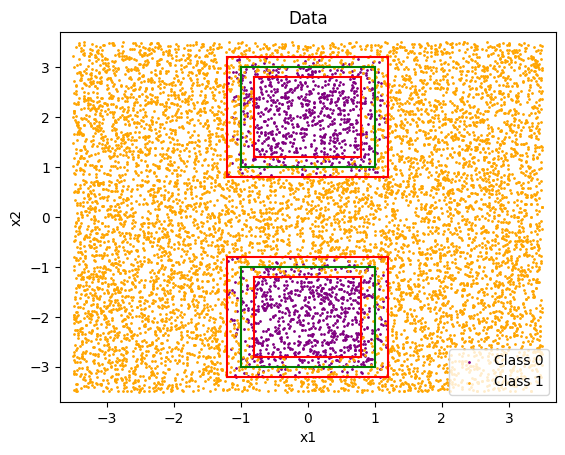

In [9]:
# imports 
import numpy as np
import matplotlib.pyplot as plt


# sample size
n = 10000

# set the seed
np.random.seed(0)

# define clusters centers
alpha_1 = np.array([0, 2])
alpha_2 = np.array([0, -2])

# generate the data
epsilon = np.random.binomial(n=1, p=0.3, size=n)
x = 7 * np.random.rand(n, 2) - 3.5
y = (np.concat((np.abs(x - alpha_1).max(axis=-1)[:, None], np.abs(x - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1
regions = (y > 0).astype(int) + 1

# buffer zone 
buffer_y_inner = (np.concat((np.abs(x - alpha_1).max(axis=-1)[:, None], np.abs(x - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 0.8
buffer_y_outer = (np.concat((np.abs(x - alpha_1).max(axis=-1)[:, None], np.abs(x - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1.2
buffer_inner = 1 * (buffer_y_inner >= 0)
buffer_outer = 1 * (buffer_y_outer <= 0)
buffer_zone = buffer_inner * buffer_outer

# compute classes
classes = []
for region, is_in_buffer_zone, flip_error in zip(regions.tolist(), buffer_zone.tolist(), epsilon.tolist()):
    if is_in_buffer_zone:
        if region == 1:
            if flip_error:
                classes.append(1)
            else:
                classes.append(0)
        else:
            if flip_error:
                classes.append(0)
            else:
                classes.append(1)
    else:
        classes.append(region-1)
classes = np.array(classes)

# plot the data with small sizes for scattered points
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], color='purple', label='Class 0', s=1)
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], color='orange', label='Class 1', s=1)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

# draw the buffer zone
# inner boundery square 1 vertices
inner_boundery_square_1_v1 = [-.8, -1.2]
inner_boundery_square_1_v2 = [.8, -1.2]
inner_boundery_square_1_v3 = [.8, -2.8]
inner_boundery_square_1_v4 = [-.8, -2.8]
# draw inner boundery square 1
plt.plot([inner_boundery_square_1_v1[0], inner_boundery_square_1_v2[0]], [inner_boundery_square_1_v1[1], inner_boundery_square_1_v2[1]], color='red')
plt.plot([inner_boundery_square_1_v2[0], inner_boundery_square_1_v3[0]], [inner_boundery_square_1_v2[1], inner_boundery_square_1_v3[1]], color='red')
plt.plot([inner_boundery_square_1_v3[0], inner_boundery_square_1_v4[0]], [inner_boundery_square_1_v3[1], inner_boundery_square_1_v4[1]], color='red')
plt.plot([inner_boundery_square_1_v4[0], inner_boundery_square_1_v1[0]], [inner_boundery_square_1_v4[1], inner_boundery_square_1_v1[1]], color='red')
# inner boundery square 2 vertices
inner_boundery_square_2_v1 = [-.8, 1.2]
inner_boundery_square_2_v2 = [.8, 1.2]
inner_boundery_square_2_v3 = [.8, 2.8]
inner_boundery_square_2_v4 = [-.8, 2.8]
# draw inner boundery square 2
plt.plot([inner_boundery_square_2_v1[0], inner_boundery_square_2_v2[0]], [inner_boundery_square_2_v1[1], inner_boundery_square_2_v2[1]], color='red')
plt.plot([inner_boundery_square_2_v2[0], inner_boundery_square_2_v3[0]], [inner_boundery_square_2_v2[1], inner_boundery_square_2_v3[1]], color='red')
plt.plot([inner_boundery_square_2_v3[0], inner_boundery_square_2_v4[0]], [inner_boundery_square_2_v3[1], inner_boundery_square_2_v4[1]], color='red')
plt.plot([inner_boundery_square_2_v4[0], inner_boundery_square_2_v1[0]], [inner_boundery_square_2_v4[1], inner_boundery_square_2_v1[1]], color='red')
# outer boundery square 1 vertices
outer_boundery_square_1_v1 = [-1.2, -.8]
outer_boundery_square_1_v2 = [1.2, -.8]
outer_boundery_square_1_v3 = [1.2, -3.2]
outer_boundery_square_1_v4 = [-1.2, -3.2]
# draw outer boundery square 1
plt.plot([outer_boundery_square_1_v1[0], outer_boundery_square_1_v2[0]], [outer_boundery_square_1_v1[1], outer_boundery_square_1_v2[1]], color='red')
plt.plot([outer_boundery_square_1_v2[0], outer_boundery_square_1_v3[0]], [outer_boundery_square_1_v2[1], outer_boundery_square_1_v3[1]], color='red')
plt.plot([outer_boundery_square_1_v3[0], outer_boundery_square_1_v4[0]], [outer_boundery_square_1_v3[1], outer_boundery_square_1_v4[1]], color='red')
plt.plot([outer_boundery_square_1_v4[0], outer_boundery_square_1_v1[0]], [outer_boundery_square_1_v4[1], outer_boundery_square_1_v1[1]], color='red')
# outer boundery square 2 vertices
outer_boundery_square_2_v1 = [-1.2, .8]
outer_boundery_square_2_v2 = [1.2, .8]  
outer_boundery_square_2_v3 = [1.2, 3.2]
outer_boundery_square_2_v4 = [-1.2, 3.2]
# draw outer boundery square 2
plt.plot([outer_boundery_square_2_v1[0], outer_boundery_square_2_v2[0]], [outer_boundery_square_2_v1[1], outer_boundery_square_2_v2[1]], color='red')
plt.plot([outer_boundery_square_2_v2[0], outer_boundery_square_2_v3[0]], [outer_boundery_square_2_v2[1], outer_boundery_square_2_v3[1]], color='red')
plt.plot([outer_boundery_square_2_v3[0], outer_boundery_square_2_v4[0]], [outer_boundery_square_2_v3[1], outer_boundery_square_2_v4[1]], color='red')
plt.plot([outer_boundery_square_2_v4[0], outer_boundery_square_2_v1[0]], [outer_boundery_square_2_v4[1], outer_boundery_square_2_v1[1]], color='red')


# vertices of boundery square 1
boundery_square_1_v1 = [-1, -3]
boundery_square_1_v2 = [1, -3]
boundery_square_1_v3 = [1, -1]
boundery_square_1_v4 = [-1, -1]
# draw boundery square 1
plt.plot([boundery_square_1_v1[0], boundery_square_1_v2[0]], [boundery_square_1_v1[1], boundery_square_1_v2[1]], color='green')
plt.plot([boundery_square_1_v2[0], boundery_square_1_v3[0]], [boundery_square_1_v2[1], boundery_square_1_v3[1]], color='green')
plt.plot([boundery_square_1_v3[0], boundery_square_1_v4[0]], [boundery_square_1_v3[1], boundery_square_1_v4[1]], color='green')
plt.plot([boundery_square_1_v4[0], boundery_square_1_v1[0]], [boundery_square_1_v4[1], boundery_square_1_v1[1]], color='green')
# vertices of boundery square 2
boundery_square_2_v1 = [-1, 1]
boundery_square_2_v2 = [1, 1]
boundery_square_2_v3 = [1, 3]
boundery_square_2_v4 = [-1, 3]
# draw boundery square 2
plt.plot([boundery_square_2_v1[0], boundery_square_2_v2[0]], [boundery_square_2_v1[1], boundery_square_2_v2[1]], color='green')
plt.plot([boundery_square_2_v2[0], boundery_square_2_v3[0]], [boundery_square_2_v2[1], boundery_square_2_v3[1]], color='green')
plt.plot([boundery_square_2_v3[0], boundery_square_2_v4[0]], [boundery_square_2_v3[1], boundery_square_2_v4[1]], color='green')
plt.plot([boundery_square_2_v4[0], boundery_square_2_v1[0]], [boundery_square_2_v4[1], boundery_square_2_v1[1]], color='green')


# set the limits
plt.xlim(-3.7, 3.7)
plt.ylim(-3.7, 3.7)

# set the title
plt.title("Data")

plt.show()

We could make errors only on the buffer zone.

$\text{theorical loss} = P(x_i \in \text{buffer zone} )\times(-0.7 \times \log(0.7) - 0.3 \times \log(0.3))$

$P(x_i \in \text{buffer zone} ) = \frac{\text{buffer area}}{\text{total area}} = \frac{2 \times (2.4^2 - 1.6^2)}{7^2} \sim 0.13$

$\text{theorical loss} \sim 0.13 \times(-0.7 \times \log(0.7) - 0.3 \times \log(0.3)) \sim 0.13 \times 0.61 = 0.0793$

In [10]:
# now we compute the empirical loss
empirical_loss = - np.mean(buffer_zone) * (0.3 * np.log(0.3) + 0.7 * np.log(0.7))

print(f"Empirical loss: {empirical_loss:.6f}")

Empirical loss: 0.078068


**Part 2 - Questions: cross-entropy loss of a random forest**
1. split the data into a training and a validation set and train a random forest model on the training set.
2. On the grid of points, compute the predicted probabilities and the approximation of true cross-entropy loss.
3. compare the cross-entropy loss of the model on the validation set to the approximation of the true cross-entropy loss.

Empirical loss: 0.162263
Empirical loss on the validation set: 0.162584


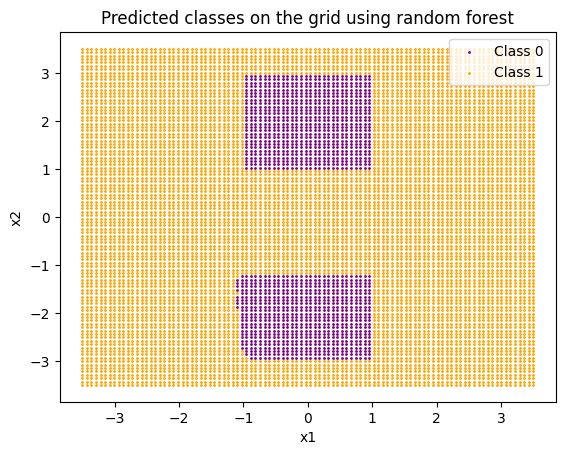

In [11]:
#1. split the data into training and testing
x_train, x_valid = x[:8000], x[8000:]

# fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(x_train, classes[:8000])

#2. generate the grid
n_grid = 100
x1x1 = np.linspace(-3.5, 3.5, n_grid)
x2x2 = np.linspace(-3.5, 3.5, n_grid)
X1, X2 = np.meshgrid(x1x1, x2x2)
X = np.c_[X1.ravel(), X2.ravel()]

# predict the classes
classes_pred_probas_grid = clf.predict_proba(X)
classes_pred_grid = clf.predict(X)

# grid buffer zone
buffer_y_inner_grid = (np.concat((np.abs(X - alpha_1).max(axis=-1)[:, None], np.abs(X - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 0.8
buffer_y_outer_grid = (np.concat((np.abs(X - alpha_1).max(axis=-1)[:, None], np.abs(X - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1.2
buffer_inner_grid = 1 * (buffer_y_inner_grid >= 0)
buffer_outer_grid = 1 * (buffer_y_outer_grid <= 0)
buffer_zone_grid = buffer_inner_grid * buffer_outer_grid

# grid regions
y_true_region = (np.concat((np.abs(X - alpha_1).max(axis=-1)[:, None], np.abs(X - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1
regions_grid = (y_true_region > 0) + 1

# grid true classes probabilities
classes_probs_grid = []
for region, is_in_buffer_zone in zip(regions_grid.tolist(), buffer_zone_grid.tolist()):
    if is_in_buffer_zone:
        if region == 1:
            classes_probs_grid.append([0.7, 0.3])
        else:
            classes_probs_grid.append([0.3, 0.7])
    else:
        classes_probs_grid.append([1, 0] if region == 1 else [0, 1])
classes_probs_grid = np.array(classes_probs_grid)


# compute the empirical loss
empirical_loss = - np.sum(classes_probs_grid * np.log(classes_pred_probas_grid), axis=-1).mean()

#3. predict validation set probabilities
classes_valid_pred_probas = clf.predict_proba(x_valid)

# compute validation classes probabilities
classes_valid_probs = []
for region, is_in_buffer_zone in zip(regions[8000:].tolist(), buffer_zone[8000:].tolist()):
    if is_in_buffer_zone:
        if region == 1:
            classes_valid_probs.append([0.7, 0.3])
        else:
            classes_valid_probs.append([0.3, 0.7])
    else:
        classes_valid_probs.append([1, 0] if region == 1 else [0, 1])
classes_valid_probs = np.array(classes_valid_probs)

# compute the validation loss
validation_loss = - np.sum(classes_valid_probs * np.log(classes_valid_pred_probas), axis=-1).mean()


print(f"Empirical loss: {empirical_loss:.6f}")
print(f"Empirical loss on the validation set: {validation_loss:.6f}")


# plot the data with small sizes for scattered points
plt.scatter(X[classes_pred_grid == 0, 0], X[classes_pred_grid == 0, 1], color='purple', label='Class 0', s=1)
plt.scatter(X[classes_pred_grid == 1, 0], X[classes_pred_grid == 1, 1], color='orange', label='Class 1', s=1)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Predicted classes on the grid using random forest")
plt.show()

